In [1]:
#F2 : Schwefel's_Problem_F2_Dim500

In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

In [3]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [4]:
dataf2 = pd.read_csv("f2.csv")
shwf_data = dataf2["f2data"].tolist()
dataf2.head(10)

,f2data
0,-26.887899
1,-4.909030
2,-56.826025
3,-95.043670
4,-4.339776
5,-50.297069
6,-2.752899
7,-84.856153
8,-74.533727
9,-60.380274


In [5]:
# Function parameters
D = 500
bias = -450
lower_bound = -100
upper_bound = 100

In [6]:
# Schwefel_Problem function with the parameters
def function(x, data=shwf_data, dim=D, f_bias=bias):
    F = abs(x[0] - data[0])
    for i in range(1,dim - 1):
        z = x[i] - data[i]
        F = max(F, abs(z))
    fc = F + f_bias
    return fc

In [7]:
#Function to compute the random uniform distribution
def fc_sol(dim, lower_bound, upper_bound):
    xmin = lower_bound * np.ones(dim)
    xmax = upper_bound * np.ones(dim)
    x0 = np.random.uniform(min(xmin), max(xmax), dim)
    return x0

In [8]:
list_sol = []
def all_sol(xk):
    fc_sol = function(xk)
    list_sol.append(fc_sol)
    return fc_sol

In [9]:
# F2-Function to solve the equation
def solver(dimension, lower_bound, upper_bound):
    global f2sol
    # Compute the initial guess
    x0 = fc_sol(dimension, lower_bound, upper_bound)
    # Minimize the function from BFGS algorithm
    f2sol = minimize(all_sol, x0, bounds=(lower_bound, upper_bound), method='BFGS', callback=all_sol)
    return f2sol, list_sol

In [10]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [11]:
plt.show()

In [12]:
# Solve the problem
solver(D, lower_bound, upper_bound)

C:\Users\Dilip\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:522: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


(      fun: -406.08118018712173
  hess_inv: array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 93.09391848, ...,  0.        ,
         38.73032907,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 38.73032907, ...,  0.        ,
         38.73032907,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  1.        ]])
       jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 

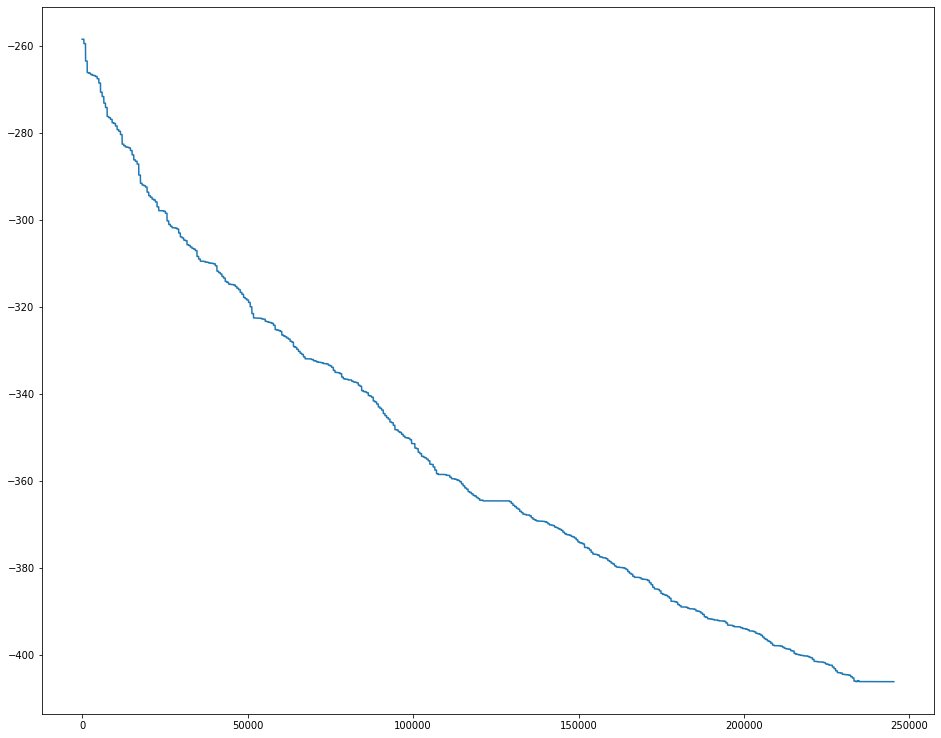

In [13]:
plot_fitness(list_sol)

In [14]:
f2_sol = pd.DataFrame(f2sol.x, columns=[''])
f2_sol.to_csv("f2_schwf500.csv", sep=",")